# Used Car Analysis & Price Prediction Dataset

This dataset provides comprehensive information about various attributes of cars, including their specifications, fuel efficiency, and pricing. The features include details such as the brand, model, manufacturing year, transmission type, mileage, fuel type, tax amount, fuel efficiency (MPG), engine size, and the price of the car. Analyzing this dataset could involve exploring relationships between different features, understanding the distribution of numerical variables, and potentially building predictive models for car prices based on the given features.

## Dataset Information
- brand: The brand or manufacturer of the car.
  - Audi
  - BMW
  - Ford
  - Toyota
- model: The model name or identifier of the car.
- year: The manufacturing year of the car.
- transmission: The type of transmission in the car.
  - Manual
  - Automatic
  - Semi-Auto
  - Other
- mileage: The total distance the car has traveled in miles.
- fuelType: The type of fuel the car uses.
  - Petrol
  - Diesel
  - Hybrid
  - Other
  - Electric
- tax: The tax amount associated with the car.
- mpg: Miles per gallon, a measure of fuel efficiency.
- engineSize: The size of the car's engine.
- price: The price of the car.

### Objective:
- With the dataset provided for car analysis, the objective is to analyze the factors influencing the pricing of cars based on various features. 
- The analysis will explore relationships between different features, understand the distribution of numerical variables, and predict car prices using machine learning models.

### Questions to be answered:

- Does the brand and model of a car significantly influence its price?
- Is there a correlation between the manufacturing year and the price of a car?
- How does the type of transmission impact the pricing of a car?
- Is there a relationship between mileage and the pricing of a car?
- Does the fuel type affect the pricing of a car?
- How does the engine size contribute to the pricing of a car?

## Importing Libraries

In [1]:
# Import packages
import random

import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

## Importing Dataset

In [2]:
# Reading the csv file cars.csv
df = pd.read_csv('Documents/used_cars_csv/cars.csv')

## Analysing Dataset

In [3]:
# Looking at the first 5 rows of our data
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4,12500
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,16500
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4,11000
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,16800
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0,17300


### Observation:
- You can see that not all the columns are in int or float data types.
- Here price column is outcome feature to predict

In [4]:
# Looking at the last 5 rows of our data
df.tail()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
46147,Toyota,IQ,2011,Automatic,30000,Petrol,20,58.9,1.0,5500
46148,Toyota,Urban Cruiser,2011,Manual,36154,Petrol,125,50.4,1.3,4985
46149,Toyota,Urban Cruiser,2012,Manual,46000,Diesel,125,57.6,1.4,4995
46150,Toyota,Urban Cruiser,2011,Manual,60700,Petrol,125,50.4,1.3,3995
46151,Toyota,Urban Cruiser,2011,Manual,45128,Petrol,125,50.4,1.3,4495


In [5]:
# Looking at the shape of our data
print('Number of rows:', df.shape[0])
print('Number of column:', df.shape[1])

Number of rows: 46152
Number of column: 10


In [6]:
# Looking at the basic info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46152 entries, 0 to 46151
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         46152 non-null  object 
 1   model         46152 non-null  object 
 2   year          46152 non-null  int64  
 3   transmission  46152 non-null  object 
 4   mileage       46152 non-null  int64  
 5   fuelType      46152 non-null  object 
 6   tax           46152 non-null  int64  
 7   mpg           46152 non-null  float64
 8   engineSize    46152 non-null  float64
 9   price         46152 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 3.5+ MB


### Observation:
- You can see that there are no missing rows in the entire dataset. So we do not need to fill/drop any value
- Columns of object datatype (String):
  - brand
  - model
  - transmission
  - fuelType
- Columns of int64 datatype:
  - year
  - price
  - mileage
  - tax
- Columns of float64 datatype:
  - mpg
  - engineSize

In [7]:
# Looking at all unique values of 4 columns of object datatype (String)
print(df.brand.unique(), end='\n\n')
print(df.model.unique(), end='\n\n')
print(df.transmission.unique(), end='\n\n')
print(df.fuelType.unique(), end='\n\n')

['Audi' 'BMW' 'Ford' 'Toyota']

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' ' GT86'
 ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius' ' Avensis'
 ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra' ' Camry'
 ' Verso-S' ' IQ' ' Urban Cruiser']

['Manual' 'Automatic' 'Semi-Auto' 'Other']

['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


### Observation:
- We have 4 unique brands:
  - Audi
  - BMW
  - Ford
  - Toyota
- There are many car models
- We have 4 unique transmission types:
  - Manual
  - Automatic
  - Semi-Auto
  - Other
- We have 5 unique fuelType types:
  - Petrol
  - Diesel
  - Hybrid
  - Other
  - Electric

In [8]:
# Looking at the description of our data
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,46152.000000,46152.000000,46152.000000,46152.000000,46152.000000,46152.000000
mean,2016.953003,24126.385162,117.834438,56.654754,1.693290,17211.224042
std,2.176703,21848.625930,66.080120,18.953835,0.611737,10200.905956
min,1996.000000,1.000000,0.000000,2.800000,0.000000,495.000000
25%,2016.000000,7835.000000,125.000000,47.900000,1.200000,10298.000000
50%,2017.000000,18454.500000,145.000000,56.500000,1.600000,14799.000000
75%,2019.000000,33477.250000,145.000000,64.200000,2.000000,20995.000000
max,2060.000000,323000.000000,580.000000,470.800000,6.600000,145000.000000


### Observation:

- Year of Manufacture:
  - The data ranges from the year 1996 to an unusual maximum value of 2060. 
  - The maximum year seems erroneous, as it is likely a typo or data entry error.
- Mileage:
  - The average mileage is around 24,217 miles
  - With a wide range from 1 mile to a maximum of 323,000 miles.
- Tax:
  - The average tax is approximately £117.74
  - With a minimum tax of 0 and a maximum of 580. 
  - There may be some outliers in the tax values.
- MPG (Miles Per Gallon):
  - The average fuel efficiency is approximately 56.7 mpg
  - With values ranging from 2.8 mpg to 470.8 mpg.
- Engine Size:
  - The average engine size is approximately 1.69 liters
  - With a minimum size of 0 liters (possibly a data entry error) and a maximum of 6.6 liters.
- Price:
  - The average car price is approximately £17,183. 
  - The prices vary widely, with a minimum value of £495 and a maximum of £145,000.

### Conclusion:
- It's important to note that the dataset may require further cleaning and validation, especially considering the anomalous maximum year and minimum engine size. Additionally, the presence of outliers in tax and mileage values may also need to be addressed.

## Preprocessing

In [9]:
# Checking for missing values
df.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

### Observation:
- There are no missing values.

In [10]:
# Checking for duplicates
df.duplicated().sum()

413

### Observation:
- There are duplicate values.

In [11]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Checking for duplicates again
df.duplicated().sum()

0

In [13]:
# Looking at the string columns of our data
df.select_dtypes(include=['object']).head()

,brand,model,transmission,fuelType
0,Audi,A1,Manual,Petrol
1,Audi,A6,Automatic,Diesel
2,Audi,A1,Manual,Petrol
3,Audi,A4,Automatic,Diesel
4,Audi,A3,Manual,Petrol


In [14]:
# Looking at the number columns of our data
df.select_dtypes(include=['number']).head()

,year,mileage,tax,mpg,engineSize,price
0,2017,15735,150,55.4,1.4,12500
1,2016,36203,20,64.2,2.0,16500
2,2016,29946,30,55.4,1.4,11000
3,2017,25952,145,67.3,2.0,16800
4,2019,1998,145,49.6,1.0,17300


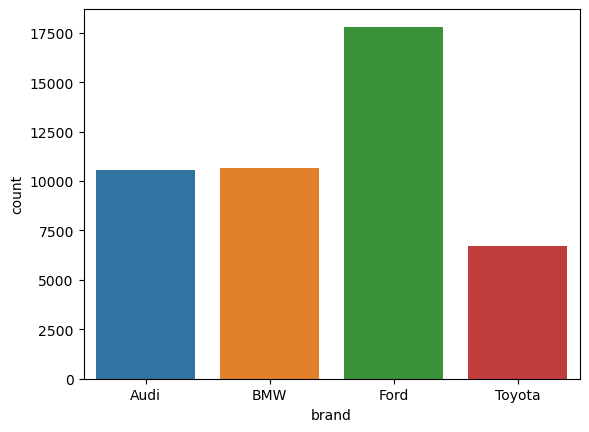

In [15]:
# Looking at the distribution of car brands
p = sns.countplot(data=df, x="brand")

### Observation:
- Dataset contains around the equal amount of Audi and BMW models slighly above 10000 for each
- Ford dominates the dataset with the amount of slightly above 17500 models
- And Toyota ends the list with amount of around 7000 models

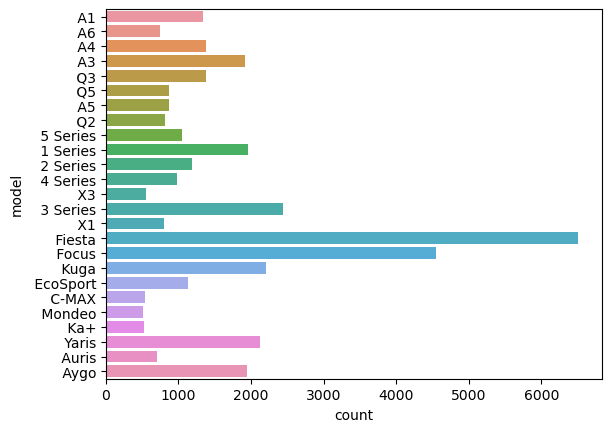

In [16]:
# Looking at the distribution of N most popular car models
top_n = 25  # Set the number of most popular car models you want to include

# Get the counts for each model
model_counts = df['model'].value_counts()

# Select the top N most popular models
top_models = model_counts.head(top_n).index

# Filter the DataFrame to include only the top models
df_top_models = df[df['model'].isin(top_models)]

# Create the count plot
p = sns.countplot(data=df_top_models, y="model")

### Observation:
- Dataset contains many different car models, thats why we only included 25 to see which models are preferred most of the mines, otherwise the plot would be impossible to read
- Fiesta dominates the dataset with the amount of slightly above 6000 models
- Focus is taking the second place with 4500 models
- And 3 series ends up in the 3rd place with around 2200 models

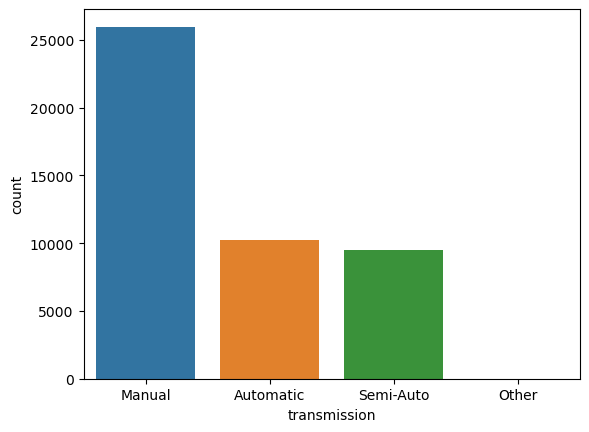

In [17]:
# Looking at the distribution of transmission types
p = sns.countplot(data=df, x="transmission")

### Observation:
- Manual transmission is used in more than half the cars in the entire dataset, 25500 manual cars
- Automatic and Semi-Auto are used twice as less and more. Around 10000 for each
- Other types are very rarely being used

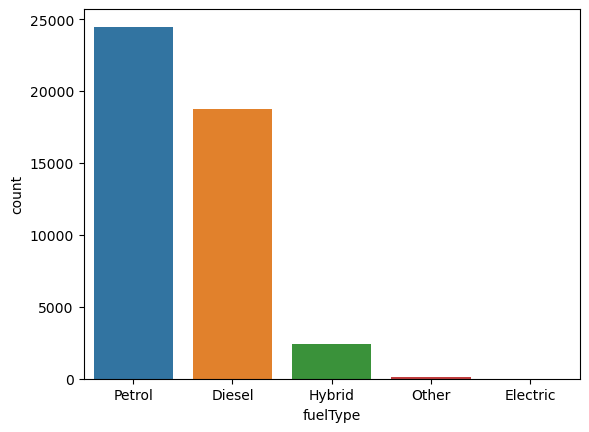

In [18]:
# Looking the distribution of fuel types
p = sns.countplot(data=df, x="fuelType")

### Observation:
- Petrol and Diesel cars are most popular. 
- Almost 25000 petrol car models and 18500 Diesel models
- Our dataset doesn't contain many Hybrid cars and almost none Electric and other types

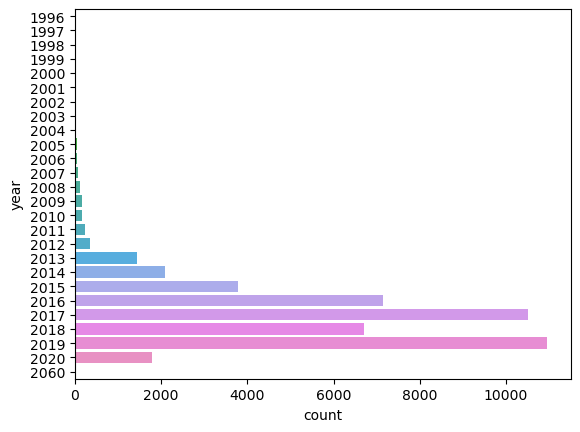

In [19]:
# Looking at the distribution of the cars' year production
p = sns.countplot(data=df, y="year")

### Observation:
- We can see that vast majority of cars are produced from 2016 to 2019

<Axes: xlabel='mileage', ylabel='Count'>

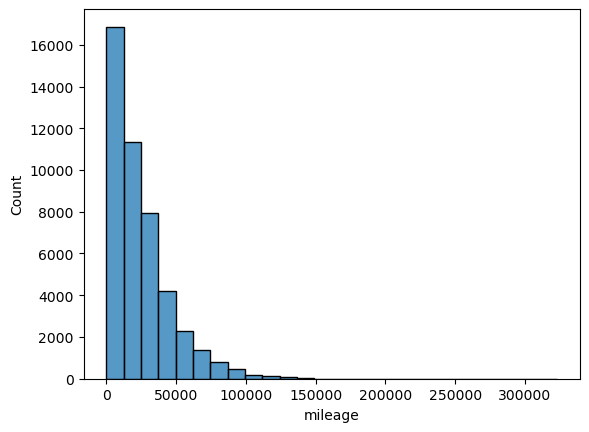

In [20]:
# Looking at the distribution of the cars' mileages
sns.histplot(df['mileage'], bins=26)

### Observation:
- Using the histogram we can see that most car models have very small mileage with 16000 models ranging from 0 to 12500 miles
- And as we go farther and increase the mileage, the count of cars decreases geometrically

<Axes: xlabel='tax', ylabel='Count'>

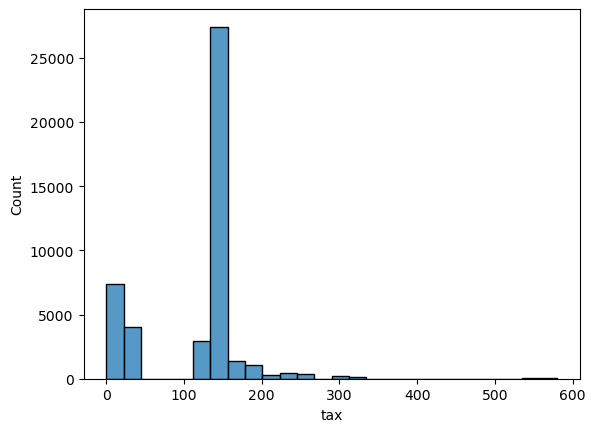

In [21]:
# Looking the distribution of the cars' taxes
sns.histplot(df['tax'], bins=26)

### Observation:
- Most of the cars' taxes are placed between 120 and 150.
- And the second largest group are taxes from 0 to 50.
- The rest of data is almsot negligible

<Axes: xlabel='mpg', ylabel='Count'>

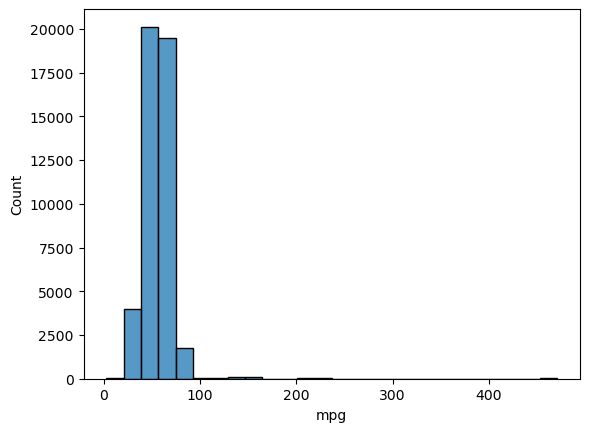

In [22]:
# Looking at the distribution of the cars' mpgs
sns.histplot(df['mpg'], bins=26)

### Observation:
- The mpg is centered mostly in values between 140 and 180

<Axes: xlabel='engineSize', ylabel='Count'>

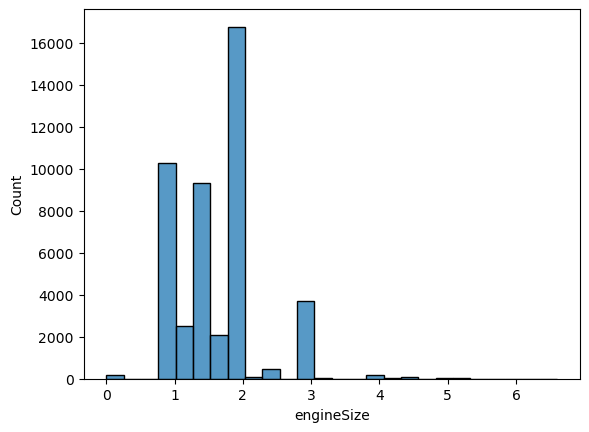

In [23]:
# Looking at the distribution of the cars' engine sizes
sns.histplot(df['engineSize'], bins=26)

### Observation:
- Engine sizes are quite interesting to anylize, they vary a lot
- Most of engine sizes are in range from 0.8l to 2l. 
- But amount of engine with 1.8l to 2.0l has almost the same amount as from 0.8l to 1l and 1.25l to 1.5l combined
- Also a big part is placed in range from 2.8l to 3l

<Axes: xlabel='price', ylabel='Count'>

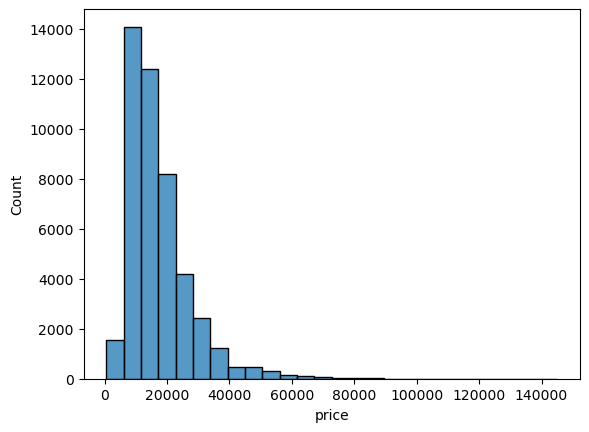

In [24]:
# Looking at the distribution of the cars' prices
sns.histplot(df['price'], bins=26)

### Observation:
- Most car models have prices varying from 4000 to 10000
- And we can clearly see that the higher price of the car is the less variants of car models we can find

<Axes: xlabel='year'>

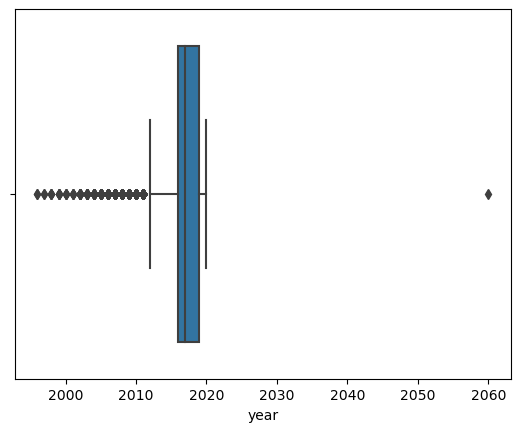

In [25]:
# Looking at the central tendency and spread of the cars' year production, as well as the presence of any outliers
sns.boxplot(x=df['year'])

## Observation:
- The data ranges from the year 1996 to an unusual maximum value of 2060
- The maximum year seems erroneous, as it is likely a typo or data entry error

<Axes: xlabel='mileage'>

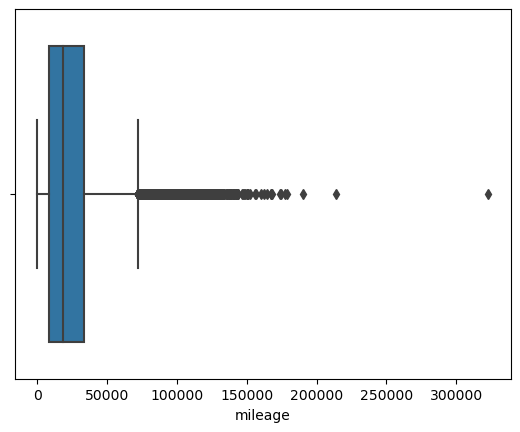

In [26]:
# Looking at the central tendency and spread of the cars' mileages, as well as the presence of any outliers
sns.boxplot(x=df['mileage'])

## Observation:
- The average mileage is around 24000 miles
- Wide range from 1 mile to a maximum of 323000 miles
- There is definetely some outliers 

<Axes: xlabel='tax'>

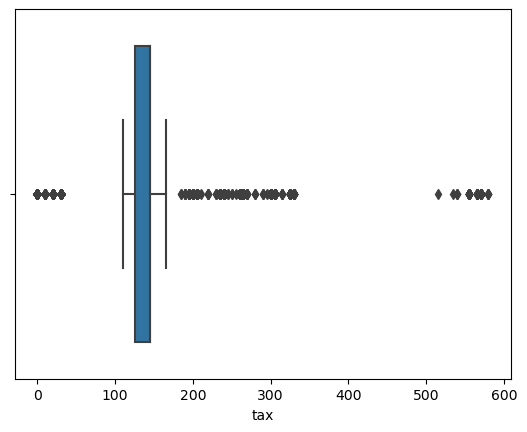

In [27]:
# Looking at the central tendency and spread of the cars' taxes, as well as the presence of any outliers
sns.boxplot(x=df['tax'])

## Observation
- The average tax is approximately £120
- With a minimum tax of 0 and a maximum of 580.
- There are some outliers in the tax values

<Axes: xlabel='mpg'>

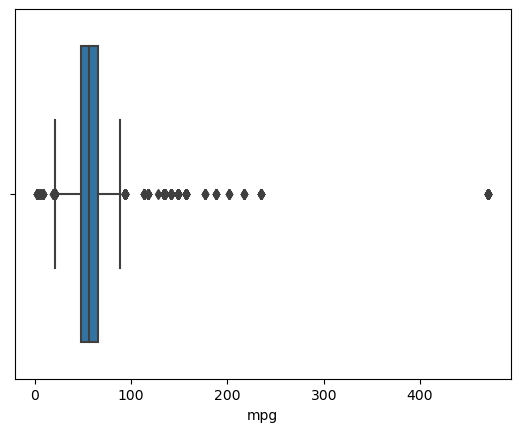

In [28]:
# Looking at the central tendency and spread of the cars' mpgs, as well as the presence of any outliers
sns.boxplot(x=df['mpg'])

## Observation
- The average fuel efficiency is approximately 56 mpg
- With values ranging a lot.
- We can see that are outliers that need to be removed

<Axes: xlabel='engineSize'>

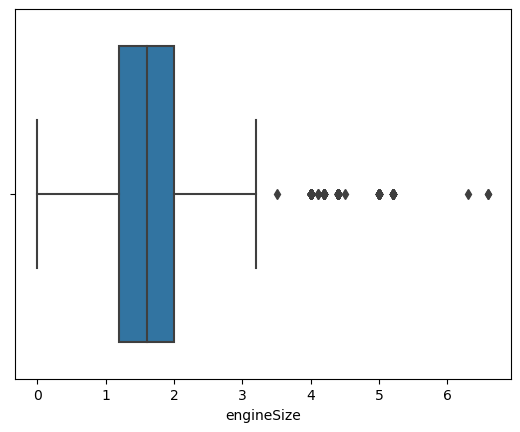

In [29]:
# Looking at the central tendency and spread of the cars' engine sizes, as well as the presence of any outliers
sns.boxplot(x=df['engineSize'])

## Observation
- Not many outliers
- With a minimum size of 0 liters (possibly a data entry error) 

<Axes: xlabel='price'>

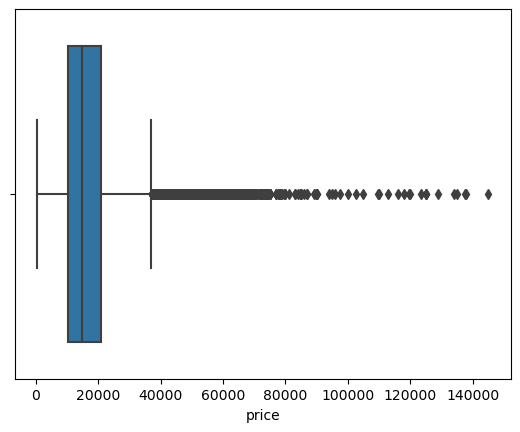

In [30]:
# Looking at the central tendency and spread of the cars' prices, as well as the presence of any outliers
sns.boxplot(x=df['price'])

## Observation
- The prices vary widely, with a minimum value of £495 and a maximum of £145,000.
- Probably the outliers would not be removed
- Even though majority of cars are outliers, there are still lot of them

# Removing Outliers using IQR (Interquartile Range) Method:

In [31]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_year = df['year'].quantile(0.25)
Q3_year = df['year'].quantile(0.75)
IQR_year = Q3_year - Q1_year

df = df[(df['year'] > Q1_year - 1.5 * IQR_year) & (df['year'] < Q3_year + 1.5 * IQR_year)]

<Axes: xlabel='year'>

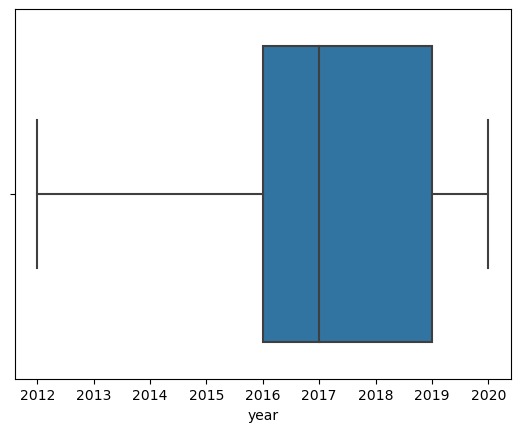

In [32]:
# Looking at the central tendency and spread of the cars' year production after applying IQR
sns.boxplot(x=df['year'])

In [33]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_mileage = df['mileage'].quantile(0.25)
Q3_mileage = df['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

df = df[(df['mileage'] > Q1_mileage - 1.5 * IQR_mileage) & (df['mileage'] < Q3_mileage + 1.5 * IQR_mileage)]

<Axes: xlabel='mileage'>

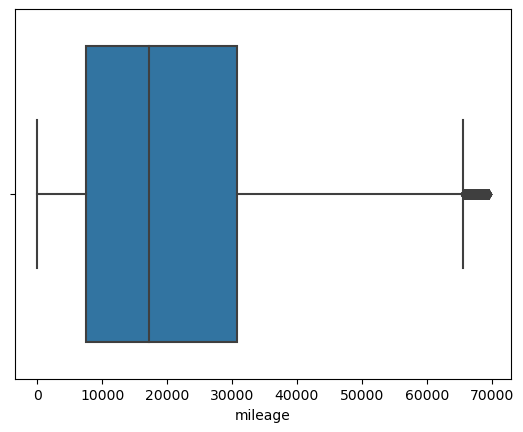

In [34]:
# Looking at the central tendency and spread of the cars' mileages after applying IQR
sns.boxplot(x=df['mileage'])

In [35]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_tax = df['tax'].quantile(0.25)
Q3_tax = df['tax'].quantile(0.75)
IQR_tax = Q3_tax - Q1_tax

df = df[(df['tax'] > Q1_tax - 1.5 * IQR_tax) & (df['tax'] < Q3_tax + 1.5 * IQR_tax)]

<Axes: xlabel='tax'>

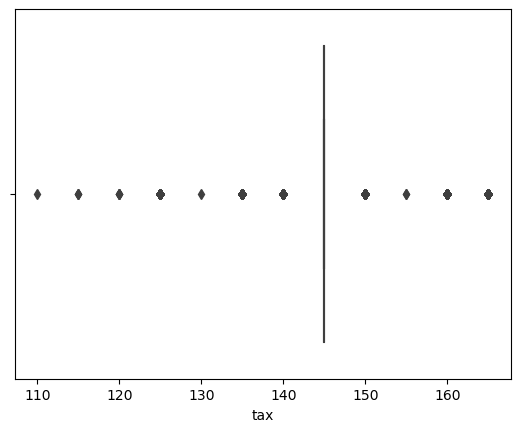

In [36]:
# Looking at the central tendency and spread of the cars' taxes after applying IQR
sns.boxplot(x=df['tax'])

In [37]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_mpg = df['mpg'].quantile(0.25)
Q3_mpg = df['mpg'].quantile(0.75)
IQR_mpg = Q3_mpg - Q1_mpg

df = df[(df['mpg'] > Q1_mpg - 1.5 * IQR_mpg) & (df['mpg'] < Q3_mpg + 1.5 * IQR_mpg)]

<Axes: xlabel='mpg'>

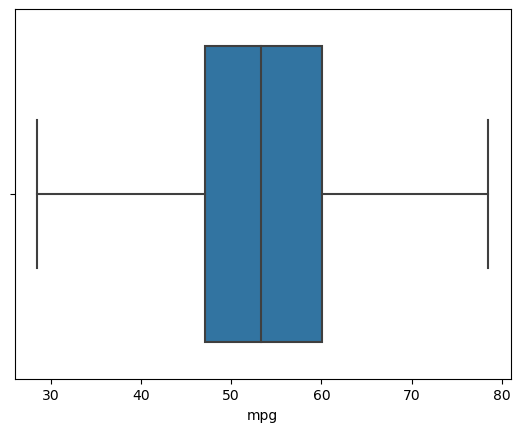

In [38]:
# Looking at the central tendency and spread of the cars' mpgs after applying IQR
sns.boxplot(x=df['mpg']) 

In [39]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_engineSize = df['engineSize'].quantile(0.25)
Q3_engineSize = df['engineSize'].quantile(0.75)
IQR_engineSize = Q3_engineSize - Q1_engineSize

df = df[(df['engineSize'] > Q1_engineSize - 1.5 * IQR_engineSize) & (df['engineSize'] < Q3_engineSize + 1.5 * IQR_engineSize)]

<Axes: xlabel='engineSize'>

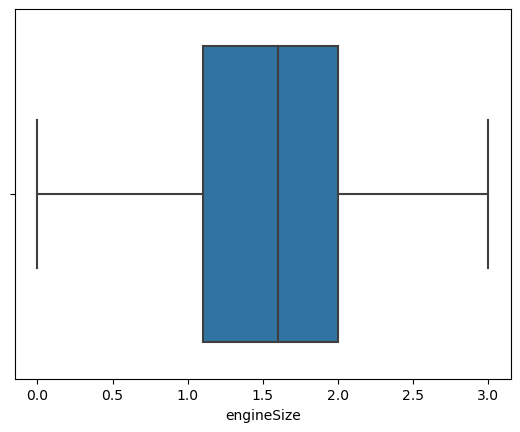

In [40]:
# Looking at the central tendency and spread of the cars' engine sizes after applying IQR
sns.boxplot(x=df['engineSize'])

In [41]:
# Use the IQR to identify and remove outliers. 
# Data points outside a certain range defined by the IQR are considered outliers.
# This method is applied to numerical columns

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

df = df[(df['price'] > Q1_price - 1.5 * IQR_price) & (df['price'] < Q3_price + 1.5 * IQR_price)]

<Axes: xlabel='price'>

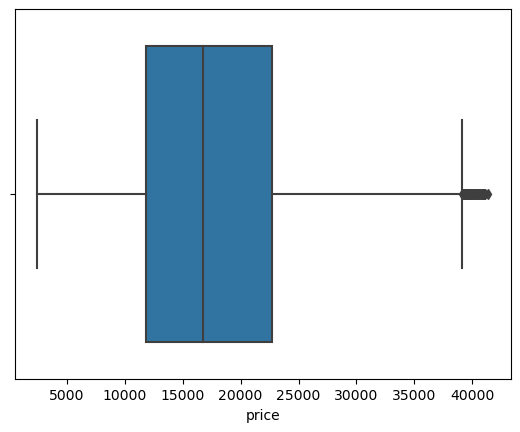

In [42]:
# Looking at the central tendency and spread of the cars' prices sizes applying IQR
sns.boxplot(x=df['price'])

# Label Encoder

In [43]:
# Initialize a LabelEncoder object
encoder = LabelEncoder()

In [44]:
# Encode 'brand' column and create a mapping dictionary
df['brand'] = encoder.fit_transform(df['brand'])
brand_mapping = {index : label for index, label in enumerate(encoder.classes_)}
brand_mapping

{0: 'Audi', 1: 'BMW', 2: 'Ford', 3: 'Toyota'}

In [45]:
# Encode 'model' column and create a mapping dictionary
df['model'] = encoder.fit_transform(df['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: ' 1 Series',
 1: ' 2 Series',
 2: ' 3 Series',
 3: ' 4 Series',
 4: ' 5 Series',
 5: ' 6 Series',
 6: ' 7 Series',
 7: ' A1',
 8: ' A3',
 9: ' A4',
 10: ' A5',
 11: ' A6',
 12: ' A7',
 13: ' A8',
 14: ' Auris',
 15: ' Avensis',
 16: ' Aygo',
 17: ' B-MAX',
 18: ' C-HR',
 19: ' C-MAX',
 20: ' Camry',
 21: ' Corolla',
 22: ' EcoSport',
 23: ' Edge',
 24: ' Fiesta',
 25: ' Focus',
 26: ' GT86',
 27: ' Galaxy',
 28: ' Grand C-MAX',
 29: ' Grand Tourneo Connect',
 30: ' KA',
 31: ' Ka+',
 32: ' Kuga',
 33: ' Land Cruiser',
 34: ' M2',
 35: ' M3',
 36: ' M4',
 37: ' Mondeo',
 38: ' Mustang',
 39: ' PROACE VERSO',
 40: ' Prius',
 41: ' Puma',
 42: ' Q2',
 43: ' Q3',
 44: ' Q5',
 45: ' Q7',
 46: ' RAV4',
 47: ' RS3',
 48: ' S-MAX',
 49: ' S3',
 50: ' S4',
 51: ' SQ5',
 52: ' TT',
 53: ' Tourneo Connect',
 54: ' Tourneo Custom',
 55: ' Urban Cruiser',
 56: ' Verso',
 57: ' Verso-S',
 58: ' X1',
 59: ' X2',
 60: ' X3',
 61: ' X4',
 62: ' X5',
 63: ' X6',
 64: ' Yaris',
 65: ' Z4'}

In [46]:
# Encode 'transmission' column and create a mapping dictionary
df['transmission'] = encoder.fit_transform(df['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [47]:
# Encode 'fuelType' column and create a mapping dictionary
df['fuelType'] = encoder.fit_transform(df['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Hybrid', 2: 'Other', 3: 'Petrol'}

# Correlation

In [48]:
# Looking at the correlation of the data
df.corr()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
brand,1.000000,0.211155,-0.051571,-0.178330,-0.001038,0.224606,-0.087122,0.380969,-0.426452,-0.580427
model,0.211155,1.000000,-0.015722,-0.064947,0.006032,0.003338,0.001916,-0.102536,-0.080062,-0.022122
year,-0.051571,-0.015722,1.000000,0.038343,-0.747556,0.098503,0.189309,-0.176405,-0.090488,0.501902
transmission,-0.178330,-0.064947,0.038343,1.000000,-0.032643,0.011239,0.091770,-0.125608,0.081234,0.116546
mileage,-0.001038,0.006032,-0.747556,-0.032643,1.000000,-0.201834,-0.155052,0.202313,0.151855,-0.396175
fuelType,0.224606,0.003338,0.098503,0.011239,-0.201834,1.000000,0.065259,-0.231185,-0.594828,-0.323980
tax,-0.087122,0.001916,0.189309,0.091770,-0.155052,0.065259,1.000000,-0.165389,0.048278,0.129442
mpg,0.380969,-0.102536,-0.176405,-0.125608,0.202313,-0.231185,-0.165389,1.000000,-0.306294,-0.489470
engineSize,-0.426452,-0.080062,-0.090488,0.081234,0.151855,-0.594828,0.048278,-0.306294,1.000000,0.615199
price,-0.580427,-0.022122,0.501902,0.116546,-0.396175,-0.323980,0.129442,-0.489470,0.615199,1.000000


## Observation
- Brand and Price: 
  - There is a negative correlation of approximately -0.45 between the brand of the car and its price. 
  - This suggests that certain brands may generally have lower or higher prices.

- Model and Price: 
  - The correlation between the model of the car and its price is positive but relatively weak (approximately 0.15). 
  - This implies that specific car models may have a slight influence on pricing.

- Year and Price: 
  - There is a moderately positive correlation of around 0.51 between the manufacturing year of the car and its price. 
  - Newer cars tend to have higher prices.

- Transmission and Price: 
  - The type of transmission has a moderate positive correlation (approximately 0.24) with the price.
  - This suggests that the transmission type can impact the pricing.

- Mileage and Price: 
  - There is a strong negative correlation of approximately -0.42 between the mileage of the car and its price. 
  - Higher mileage generally corresponds to lower prices.

- FuelType and Price: 
  - The fuel type shows a moderate negative correlation (around -0.20) with the price. 
  - Certain fuel types may be associated with lower prices.

- Tax and Price: 
  - There is a positive correlation of around 0.33 between the tax amount and the price. 
  - Higher tax amounts may contribute to higher car prices.

- MPG and Price: 
  - Miles per gallon (MPG) has a negative correlation of approximately -0.31 with the price. 
  - More fuel-efficient cars (higher MPG) may have lower prices.

- EngineSize and Price: 
  - There is a strong positive correlation of about 0.64 between the engine size and the price. 
  - Larger engine sizes are associated with higher prices.

These observations provide insights into the relationships between different features and the pricing of cars in the dataset. For example, new cars with larger engine sizes and better fuel efficiency tend to have higher prices, while higher mileage and certain fuel types may lead to lower prices.

# Models

In [49]:
# Split the data into features (x) and target variable (y)
x = df.drop('price', axis=1)
y = df['price']

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

# showing data
print('X \n', X[:5])
print('y \n', y[:5])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X 
 [[0.         0.10769231 0.625      0.5        0.2266853  1.
  0.72727273 0.53521127 0.46666667]
 [0.         0.13846154 0.625      0.         0.37388523 0.
  0.63636364 0.77464789 0.66666667]
 [0.         0.12307692 0.875      0.5        0.02877148 1.
  0.63636364 0.41851107 0.33333333]
 [0.         0.12307692 0.625      0.5        0.41715051 1.
  0.63636364 0.6056338  0.46666667]
 [0.         0.16923077 0.5        0.         0.75202063 0.
  0.27272727 0.57947686 0.66666667]]
y 
 0     12500
3     16800
4     17300
10    16100
11    16500
Name: price, dtype: int64


In [50]:
print("X_train shape is:", X_train.shape)

X_train shape is: (23312, 9)


In [51]:
print("X_test shape is:", X_test.shape)

X_test shape is: (5828, 9)


In [52]:
print("y_train shape is:", y_train.shape)

y_train shape is: (23312,)


In [53]:
print("y_test shape is:", y_test.shape)

y_test shape is: (5828,)


### Linear Regression model

In [54]:
# Train and evaluate Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

print(f'Linear Regression Mean Squared Error: {linear_reg_mse}')
print(f'Linear Regression Train Score is : {linear_reg_model.score(X_train, y_train)}')
print(f'Linear Regression Test Score is : {linear_reg_model.score(X_test, y_test)}')
print(f'Linear Regression Coef is : {linear_reg_model.coef_}')
print(f'Linear Regression intercept is : {linear_reg_model.intercept_}')
print('----------------------------------------------------')

y_pred = linear_reg_model.predict(X_test)
print(f'Predicted Value for Linear Regression is : {y_pred[:5]}')

Linear Regression Mean Squared Error: 10980614.85396212
Linear Regression Train Score is : 0.8177430043074085
Linear Regression Test Score is : 0.8126024701574499
Linear Regression Coef is : [-7309.39135329  1964.34703479 16689.87673354  -147.70141327
 -6176.80165575 -1449.29307077 -2328.39044121 -5986.15330543
 19749.30358586]
Linear Regression intercept is : 4949.670843642209
----------------------------------------------------
Predicted Value for Linear Regression is : [26011.47508782 22990.33508644  8148.79222932 29828.17769469
 22879.53089547]


       Real_Values  Predicted_Values
5427         18900      16439.656893
30564        11495      10710.625865
31772        10060      14237.407577
41580        10995      11661.407943
44390         8995       7033.987378


C:\Users\Hasi_Yugoslavna\AppData\Local\Temp\ipykernel_8688\113472146.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5743) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

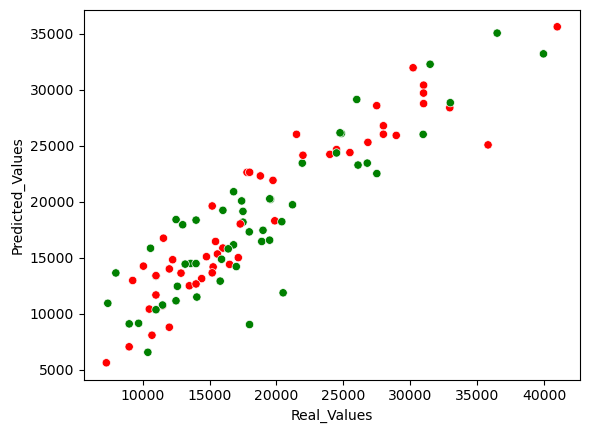

In [55]:
df_pred = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values': linear_reg_predictions})

# Sample 100 random values from df_pred
sample_size = 100
random_indices = random.sample(range(len(df_pred)), sample_size)

# Create a DataFrame with the sampled values
df_sampled = df_pred.iloc[random_indices]

# Display the sampled DataFrame
print(df_sampled.head())

# Plot the scatter plot for the sampled values
sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)

### Observation:
  - Performance: Moderate
  - MSE: 10,980,614.85
  - Training Score: 81.77%
  - Test Score: 81.26%
  - The Linear Regression model performs decently, capturing some linear relationships. However, the relatively high MSE indicates room for improvement.

### Decision Tree Regressor model

In [56]:
# Train and evaluate Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

print(f'Decision Tree Regressor Mean Squared Error: {dt_mse}')
print(f'Decision Tree Regressor Train Score is : {dt_model.score(X_train, y_train)}')
print(f'Decision Tree Regressor Test Score is : {dt_model.score(X_test, y_test)}')
print(f'Decision Tree Regressor Feature Importances: {dt_model.feature_importances_}')
print('----------------------------------------------------')

y_pred = dt_model.predict(X_test)
print(f'Predicted Value for Decision Tree Regressor is : {y_pred[:5]}')

Decision Tree Regressor Mean Squared Error: 4956160.510397602
Decision Tree Regressor Train Score is : 0.9992818723401333
Decision Tree Regressor Test Score is : 0.9154171009998975
Decision Tree Regressor Feature Importances: [0.41249232 0.0876686  0.24782758 0.0130056  0.04122831 0.00444693
 0.00273488 0.04788185 0.14271393]
----------------------------------------------------
Predicted Value for Decision Tree Regressor is : [26950. 18250.  7780. 29498. 19995.]


       Real_Values  Predicted_Values
14423        23980           22499.0
14611        31480           31480.0
21629        14998           12240.0
37130        17369           15991.0
4922         28500           27447.5


C:\Users\Hasi_Yugoslavna\AppData\Local\Temp\ipykernel_8688\1405917049.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5743) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

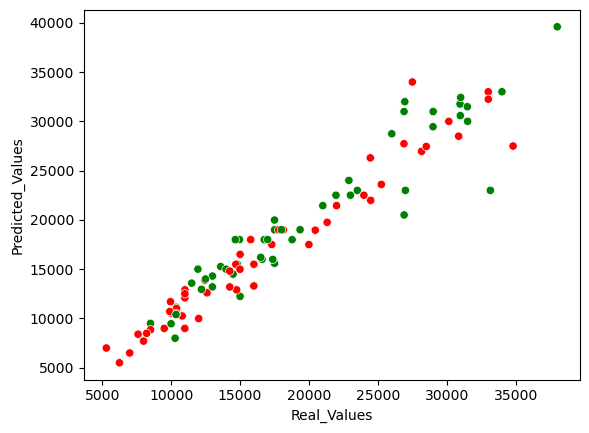

In [57]:
df_pred = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values': dt_predictions})

# Sample 100 random values from df_pred
sample_size = 100
random_indices = random.sample(range(len(df_pred)), sample_size)

# Create a DataFrame with the sampled values
df_sampled = df_pred.iloc[random_indices]

# Display the sampled DataFrame
print(df_sampled.head())

# Plot the scatter plot for the sampled values
sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)

### Observation:
  - Performance: Overfitting
  - MSE: 5,000,659.69
  - Training Score: 99.93%
  - Test Score: 91.47%
  - The Decision Tree Regressor overfits the training data, resulting in a model that performs exceptionally well on training but less effectively on the test set.

### Random Forest Regressor model

In [58]:
# Train and evaluate Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f'Random Forest Regressor Mean Squared Error: {rf_mse}')
print(f'Random Forest Regressor Train Score is : {rf_model.score(X_train, y_train)}')
print(f'Random Forest Regressor Test Score is : {rf_model.score(X_test, y_test)}')
print(f'Random Forest Regressor Feature Importances: {rf_model.feature_importances_}')
print('----------------------------------------------------')

y_pred_rf = rf_model.predict(X_test)
print(f'Predicted Value for Random Forest Regressor is : {y_pred_rf[:5]}')

Random Forest Regressor Mean Squared Error: 2984339.8301325026
Random Forest Regressor Train Score is : 0.9927477228255375
Random Forest Regressor Test Score is : 0.9490686159367687
Random Forest Regressor Feature Importances: [0.41184365 0.08737832 0.24825283 0.01143709 0.04061529 0.00467854
 0.00293024 0.04855273 0.14431131]
----------------------------------------------------
Predicted Value for Random Forest Regressor is : [29323.08 20112.22  8135.42 29961.11 18803.53]


       Real_Values  Predicted_Values
12090        31070          31580.23
27624        13985          15326.29
16890        24500          22761.10
2250         23995          23625.15
25734        13990          16454.39


C:\Users\Hasi_Yugoslavna\AppData\Local\Temp\ipykernel_8688\3273689577.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5743) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

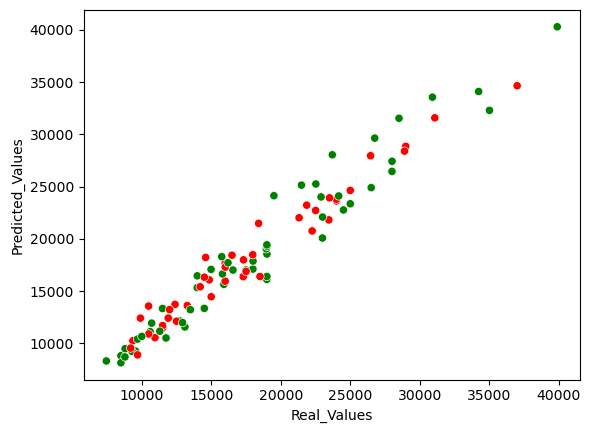

In [59]:
df_pred = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values': rf_predictions})

# Sample 100 random values from df_pred
sample_size = 100
random_indices = random.sample(range(len(df_pred)), sample_size)

# Create a DataFrame with the sampled values
df_sampled = df_pred.iloc[random_indices]

# Display the sampled DataFrame
print(df_sampled.head())

# Plot the scatter plot for the sampled values
sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)

### Observation:
  - Performance: Good
  - MSE: 2,987,109.35
  - Training Score: 99.28%
  - Test Score: 94.90%
  - The Random Forest Regressor addresses overfitting seen in the Decision Tree model, providing a robust solution with a significantly lower MSE and high test score.

### Lasso Regression model

In [60]:
# Train and evaluate Lasso Regression model
lasso_model = Lasso()  
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print(f'Lasso Regression Mean Squared Error: {lasso_mse}')
print(f'Lasso Regression Train Score is : {lasso_model.score(X_train, y_train)}')
print(f'Lasso Regression Test Score is : {lasso_model.score(X_test, y_test)}')
print(f'Lasso Regression Coef is : {lasso_model.coef_}')
print(f'Lasso Regression Intercept is : {lasso_model.intercept_}')
print('----------------------------------------------------')

y_pred_lasso = lasso_model.predict(X_test)
print(f'Predicted Value for Lasso Regression is : {y_pred_lasso[:5]}')

Lasso Regression Mean Squared Error: 10978597.44085181
Lasso Regression Train Score is : 0.8177396538518089
Lasso Regression Test Score is : 0.8126368997625832
Lasso Regression Coef is : [-7303.46638972  1947.7347124  16659.14114062  -137.75622839
 -6163.12618687 -1454.39507069 -2255.91531345 -5979.12438311
 19704.25770066]
Lasso Regression Intercept is : 4945.484390941336
----------------------------------------------------
Predicted Value for Lasso Regression is : [25996.64612073 22983.45849082  8162.78406664 29807.47783233
 22876.36911573]


       Real_Values  Predicted_Values
25623        20695      22705.681493
9209         23290      28167.412442
10541        20000      18991.494086
31597         8995      10100.785009
11648        24998      25815.670090


C:\Users\Hasi_Yugoslavna\AppData\Local\Temp\ipykernel_8688\2066553492.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5743) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

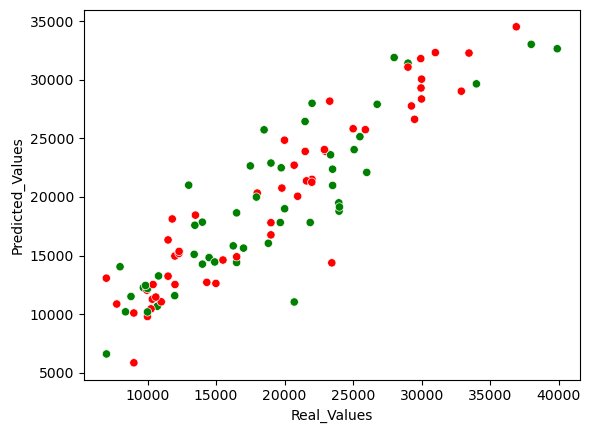

In [61]:
df_pred = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values': lasso_predictions})

# Sample 100 random values from df_pred
sample_size = 100
random_indices = random.sample(range(len(df_pred)), sample_size)

# Create a DataFrame with the sampled values
df_sampled = df_pred.iloc[random_indices]

# Display the sampled DataFrame
print(df_sampled.head())

# Plot the scatter plot for the sampled values
sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)

### Observation:
  - Performance: Similar to Linear Regression
  - MSE: 10,978,597.44
  - Training Score: 81.77%
  - Test Score: 81.26%
  - Lasso Regression performs similarly to Linear Regression, suggesting that regularization techniques may not strongly impact model performance in this context.

### Ridge Regression model

In [62]:
# Train and evaluate Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

print(f'Ridge Regression Mean Squared Error: {ridge_mse}')
print(f'Ridge Regression Train Score is : {ridge_model.score(X_train, y_train)}')
print(f'Ridge Regression Test Score is : {ridge_model.score(X_test, y_test)}')
print(f'Ridge Regression Coef is : {ridge_model.coef_}')
print(f'Ridge Regression Intercept is : {ridge_model.intercept_}')
print('----------------------------------------------------')

y_pred_ridge = ridge_model.predict(X_test)
print(f'Predicted Value for Ridge Regression is : {y_pred_ridge[:5]}')

Ridge Regression Mean Squared Error: 10979861.312358854
Ridge Regression Train Score is : 0.81774173657487
Ridge Regression Test Score is : 0.8126153302601822
Ridge Regression Coef is : [-7310.3849691   1958.41087722 16647.92372445  -146.77959508
 -6191.42242838 -1464.64596609 -2313.55297032 -6007.65551789
 19686.25870878]
Ridge Regression Intercept is : 5030.86668386113
----------------------------------------------------
Predicted Value for Ridge Regression is : [26010.6041303  22997.65617468  8149.31765687 29804.32482267
 22884.40104927]


       Real_Values  Predicted_Values
34465        16600      20585.227697
36983        14000      14942.921922
28249        15999      17180.639073
15532        27710      25034.409701
28379        10995      10376.711833


C:\Users\Hasi_Yugoslavna\AppData\Local\Temp\ipykernel_8688\2506540340.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5743) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

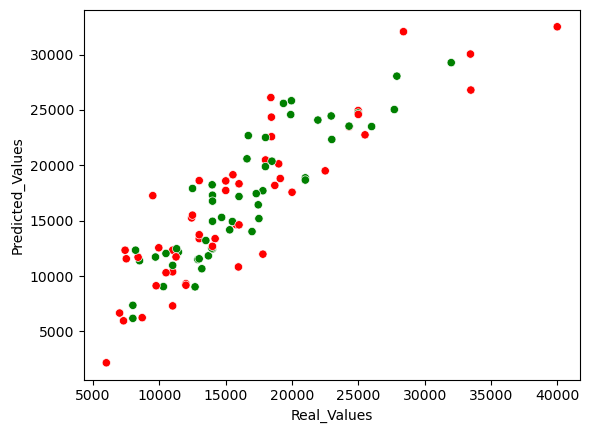

In [63]:
df_pred = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values': ridge_predictions})

# Sample 100 random values from df_pred
sample_size = 100
random_indices = random.sample(range(len(df_pred)), sample_size)

# Create a DataFrame with the sampled values
df_sampled = df_pred.iloc[random_indices]

# Display the sampled DataFrame
print(df_sampled.head())

# Plot the scatter plot for the sampled values
sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)

### Observation:
  - Performance: Similar to Linear Regression
  - MSE: 10,979,861.31
  - Training Score: 81.77%
  - Test Score: 81.26%
  - Ridge Regression, like Lasso, exhibits performance akin to Linear Regression, indicating that regularization doesn't significantly enhance predictive accuracy.


### K-Neighbors Regressor model

In [64]:
# Train and evaluate K-Neighbors Regressor model
k_neighbors_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
k_neighbors_model.fit(X_train, y_train)
k_neighbors_predictions = k_neighbors_model.predict(X_test)
k_neighbors_mse = mean_squared_error(y_test, k_neighbors_predictions)

print(f'K-Neighbors Regressor Mean Squared Error: {k_neighbors_mse}')
print(f'K-Neighbors Regressor Train Score is : {k_neighbors_model.score(X_train, y_train)}')
print(f'K-Neighbors Regressor Test Score is : {k_neighbors_model.score(X_test, y_test)}')
print('----------------------------------------------------')

y_pred_k_neighbors = k_neighbors_model.predict(X_test)
print(f'Predicted Value for K-Neighbors Regressor is : {y_pred_k_neighbors[:5]}')

K-Neighbors Regressor Mean Squared Error: 4147936.9276458477
K-Neighbors Regressor Train Score is : 0.9576449070735299
K-Neighbors Regressor Test Score is : 0.9292104181303608
----------------------------------------------------
Predicted Value for K-Neighbors Regressor is : [25640.  19904.6  7358.  30191.8 22395.8]


       Real_Values  Predicted_Values
15338        27950           28494.2
33371        17750           16616.8
13935        26990           26669.2
25621        17890           15678.8
27420        15295           17121.2


C:\Users\Hasi_Yugoslavna\AppData\Local\Temp\ipykernel_8688\3852110652.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5743) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

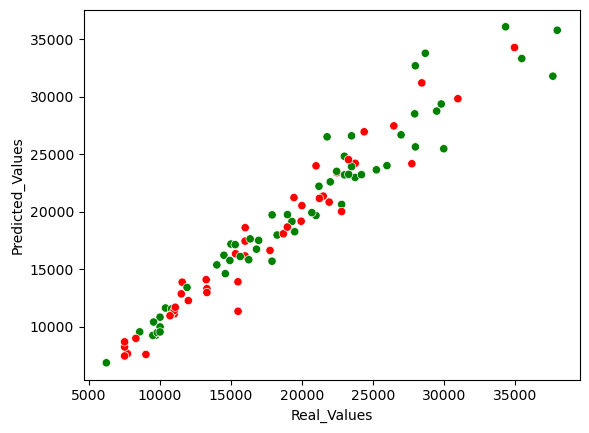

In [65]:
df_pred = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values': k_neighbors_predictions})

# Sample 100 random values from df_pred
sample_size = 100
random_indices = random.sample(range(len(df_pred)), sample_size)

# Create a DataFrame with the sampled values
df_sampled = df_pred.iloc[random_indices]

# Display the sampled DataFrame
print(df_sampled.head())

# Plot the scatter plot for the sampled values
sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)

### Observation:
  - Performance: Good
  - MSE: 4,147,936.93
  - Training Score: 95.76%
  - Test Score: 92.92%
  - Observation: K-Neighbors Regressor captures non-linear patterns well, providing a good balance between complexity and generalization. 

### Support Vector Regressor (SVR) model

In [66]:
# Train and evaluate Support Vector Regressor (SVR) model
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)

print(f'Support Vector Regressor Mean Squared Error: {svr_mse}')
print(f'Support Vector Regressor Train Score is: {svr_model.score(X_train, y_train)}')
print(f'Support Vector Regressor Test Score is: {svr_model.score(X_test, y_test)}')
print('----------------------------------------------------')

y_pred_svr = svr_model.predict(X_test)
print(f'Predicted Value for Support Vector Regressor is: {y_pred_svr[:5]}')


Support Vector Regressor Mean Squared Error: 44782056.894915864
Support Vector Regressor Train Score is: 0.2445933187867464
Support Vector Regressor Test Score is: 0.235739805558549
----------------------------------------------------
Predicted Value for Support Vector Regressor is: [17998.34998505 18033.7639744  14297.50858881 18247.66319197
 18295.73719886]


       Real_Values  Predicted_Values
4462         37490      18195.401773
24870        10991      14478.147829
38969        10500      15338.393649
44062        10195      14740.888757
10756        19490      17935.266700


C:\Users\Hasi_Yugoslavna\AppData\Local\Temp\ipykernel_8688\3325863667.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5743) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)


<Axes: xlabel='Real_Values', ylabel='Predicted_Values'>

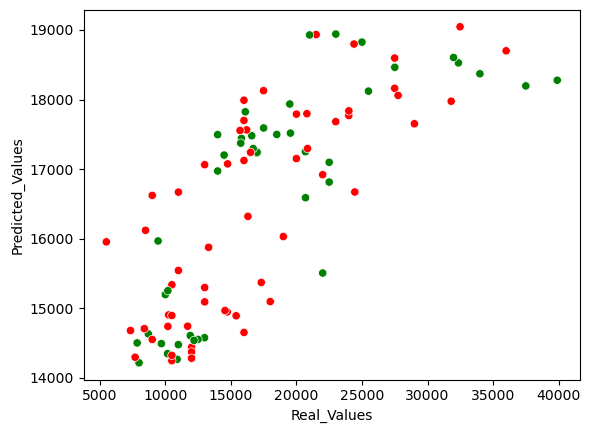

In [67]:
df_pred = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values': svr_predictions})

# Sample 100 random values from df_pred
sample_size = 100
random_indices = random.sample(range(len(df_pred)), sample_size)

# Create a DataFrame with the sampled values
df_sampled = df_pred.iloc[random_indices]

# Display the sampled DataFrame
print(df_sampled.head())

# Plot the scatter plot for the sampled values
sns.scatterplot(x='Real_Values', y='Predicted_Values', data=df_sampled, hue=df['price'], palette=['red', 'green'], legend=False)

### Observation:
  - Performance: Poor
  - MSE: 44,782,056.89
  - Training Score: 24.46%
  - Test Score: 23.57%
  - Observation: SVR struggles to capture patterns in the data, resulting in a high MSE and low test score. It might not be well-suited for this dataset.

  
## Conclusion:

### The Random Forest Regressor model:
  - Emerges as the top performer, demonstrating superior performance with the lowest MSE and a high test score. 
  - It effectively balances model complexity and generalization, making it a recommended choice for this dataset. 
  
### The Decision Tree Regressor:
  - While powerful, exhibits overfitting. 
  
### Linear Regression, Lasso, and Ridge Regression models:
  - Perform similarly, suggesting that their predictive power is limited in this context. 
  
### K-Neighbors Regressor:
  - Performs well, providing a good alternative for capturing non-linear relationships.
  
### SVR:
  - Struggles to capture the underlying patterns, making it less suitable for this particular dataset.